# Coding Block 2 - Logistic Regression

### Load the packages

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
'''
...
'''

'\n...\n'

### Read the dataset (You can test both preprocessed and raw data). 

In [17]:
df = pd.read_csv('../data/df_imputed_clean.csv')

### Let's Do Some Predictive Modeling

### Stratification:
Split the dataset into train (75%) and test datasets (25%)

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_minmax = MinMaxScaler()
minmax_columns = ['Pregnancies','Age','SkinThickness','Insulin','DiabetesPedigreeFunction',]
# Assume df is your dataset
# Define features (X) and target (y)
df_minmax_scaled = pd.DataFrame(scaler_minmax.fit_transform(df[minmax_columns]), columns=minmax_columns)

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


### Do a Logistic Regression with test and training data

Accuracy: 0.70

Classification Report:
              precision    recall  f1-score   support

         0.0       0.77      0.79      0.78       122
         1.0       0.56      0.54      0.55        61

    accuracy                           0.70       183
   macro avg       0.67      0.66      0.67       183
weighted avg       0.70      0.70      0.70       183



/Users/chrisoesterreich/Developement/anaconda3/envs/aa_monday/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


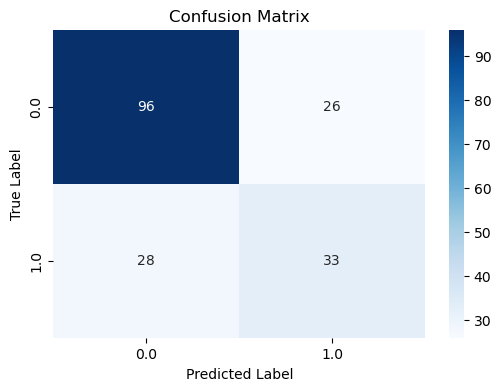

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### Calculate Odds Ratios 
Find out about the feature importance by calculating the odds ratios of the logistic regression model 

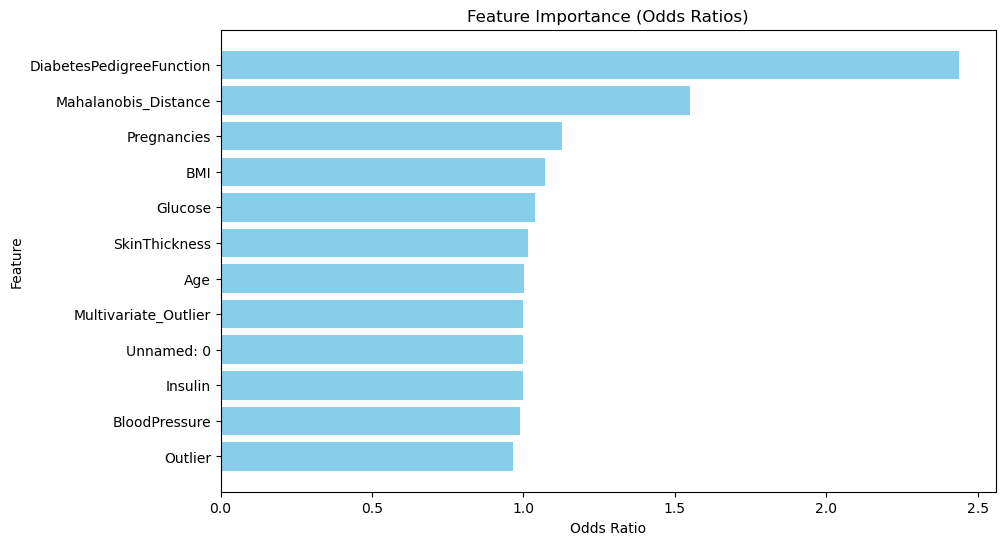

,Feature,Odds Ratio
7,DiabetesPedigreeFunction,2.437644
9,Mahalanobis_Distance,1.551624
1,Pregnancies,1.125985
6,BMI,1.070748
2,Glucose,1.036748
4,SkinThickness,1.014527
8,Age,1.000383
10,Multivariate_Outlier,1.000000
0,Unnamed: 0,0.999025
5,Insulin,0.997900


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Extract coefficients and compute odds ratios
odds_ratios = np.exp(model.coef_[0])
feature_importance = pd.DataFrame({'Feature': X.columns, 'Odds Ratio': odds_ratios})
feature_importance = feature_importance.sort_values(by='Odds Ratio', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Odds Ratio'], color='skyblue')
plt.xlabel('Odds Ratio')
plt.ylabel('Feature')
plt.title('Feature Importance (Odds Ratios)')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.show()

# Display feature importance values
feature_importance


### Logistic Regression Using Standardization

Do a logistic regression on data that has been standardized before. Are there differences in the model output?